5. Write a program to apply various 2D transformations on a 2D object (use homogenous coordinates).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def print_obj(obj_org, obj_new, label=" ", fig_size=(14, 6)):
    """
    print object 
    Argument:
        
        obj_org (ndarray)   : original object ,shape(m, n).
        obj_new (ndarray)   : new  object after transformation, shape(m, n).
        label (string)      : label of object.
        fig_size (tuple)    :
    Return:
        ax

    """
    m, n = obj_org.shape
    obj_org = obj_org[:m-1, :]
    obj_org = np.concatenate((obj_org, obj_org[:, 0].reshape(-1, 1)), axis=1)
    obj_new = obj_new[:m-1, :]
    obj_new = np.concatenate((obj_new, obj_new[:, 0].reshape(-1, 1)), axis=1)

    X_LIM_POS = max(np.concatenate((obj_org[0, :], obj_new[0, :]))) + 2
    X_LIM_NEG = min(np.concatenate((obj_org[0, :], obj_new[0, :]))) - 2
    Y_LIM_POS = max(np.concatenate((obj_org[1, :], obj_new[1, :]))) + 2
    Y_LIM_NEG = min(np.concatenate((obj_org[1, :], obj_new[1, :]))) - 2

    fig, ax =plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(ax)):
        ax[i].set_xlim((X_LIM_NEG, X_LIM_POS))
        ax[i].set_ylim((Y_LIM_NEG, Y_LIM_POS))
        ax[i].plot([X_LIM_NEG, X_LIM_POS], [0, 0], c="r", label="original axis")
        ax[i].plot([0, 0], [Y_LIM_NEG, Y_LIM_POS], c="r")

        
    
    ax[0].plot(obj_org[0, :], obj_org[1, :], label="before "+label)
    ax[1].plot(obj_new[0, :], obj_new[1, :], label="after "+label)
    ax[0].legend()
    ax[1].legend()

    LIM = (X_LIM_POS, X_LIM_NEG, Y_LIM_POS, Y_LIM_NEG)
    return ax, LIM


In [ ]:
def translation(obj_org, t_v):
    """ 
    translation an object to (tx i + ty j) from its original position.
    Argument:
        obj_org (ndarray)   : original object ,shape(m, n).
        t_v (tuple)         : (tx, ty) translation tx, ty along x and y axis.
    return:
        obj_new (ndarray)   : new object after rotation.
    """
    pass

In [ ]:
def rotation(obj_org, theta=0, co_ordinate=(0, 0)):
    """ 
    rotation an object with respect to given co-ordinate.
    Argument:
        obj_org (ndarray)   : original object ,shape(m, n).
        theta (scaler)      : angle in degree.
        co_ordinate (tuple) : co-ordinate with respect ro rotate.
    return:
        obj_new (ndarray)   : new object after rotation.
    """
    pass

In [ ]:
def scaling(obj, scaling_factor):
    """ 
    scalin an object s_x time along x-axis and s_y time along y-axis.
    Argument:
        obj_org (ndarray)       : original object ,shape(m, n).
        scaling_factor (tuple)  : (s_x, x_y) scaling factor along x and y axis.
    return:
        obj_new (ndarray)       : new object after rotation.
    """
    s_x, s_y = scaling_factor
    scaling_vector =  np.array([[s_x,  0, 0], \
                                [  0,s_y, 0], \
                                [  0,  0, 1]])
    pass

In [55]:
def reflection(theta, c, obj):
    """
    Reflect the obj 
    Argument:
        theta (scaler)      : theta is the angle with respect to x axis.
        c  (scaler)         : y intersect i.e. the line intersect y-axis at (0, c) point.
        obj (ndarray)       : shape(m, n), it is the object.
        X_LIM (scaler)      : limit of graph along x-axis.
        Y_LIM (scaler)      : limit of graph along y-axis.
    Return:
        fig (object)        : graph object
        ax (object)         : graph object (matrics)
    """
    # positive translation vector
    T_v = np.array([[1, 0, 0], \
                    [0, 1, c], \
                    [0, 0, 1]])
    # negetive translation vector
    T_minus_v = np.array([[1, 0, 0], \
                          [0, 1,-c], \
                          [0, 0, 1]])
    # rotation vector (theta negetive rotation)
    R_minus_theta = np.array([[ np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta)), 0], \
                              [-np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0], \
                              [                         0,                         0, 1]])
    
    # rotation vector (theta positive rotation)
    R_theta = np.array([[np.cos(np.deg2rad(theta)),-np.sin(np.deg2rad(theta)), 0], \
                        [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0], \
                        [                        0,                         0, 1]])
    # reflection vector
    Ref_x =  np.array([[1, 0, 0], \
                       [0,-1, 0], \
                       [0, 0, 1]])
    
    m = np.tan(np.deg2rad(theta))
    
    obj1 = np.dot(T_minus_v, obj)
    obj2 = np.dot(R_minus_theta, obj1)
    obj3 = np.dot(Ref_x, obj2)
    obj4 = np.dot(R_theta, obj3)
    obj_prime = np.dot(T_v, obj4)
    
    # print reflected object
    ax, LIM = print_obj(obj, obj_prime, label="Reflected Object")

    X_LIM_POS, X_LIM_NEG, Y_LIM_POS, Y_LIM_NEG = LIM
    m = np.tan(np.deg2rad(theta))
    x = np.arange(X_LIM_NEG, X_LIM_POS+1)

    ax[0].plot(x, m*x+c, label="y={}x+{}".format(np.around(m,1), c), linestyle="--")
    ax[1].plot(x, m*x+c, label="y={}x+{}".format(np.around(m,1), c), linestyle="--")
    ax[0].legend()
    ax[1].legend()
    return obj_prime

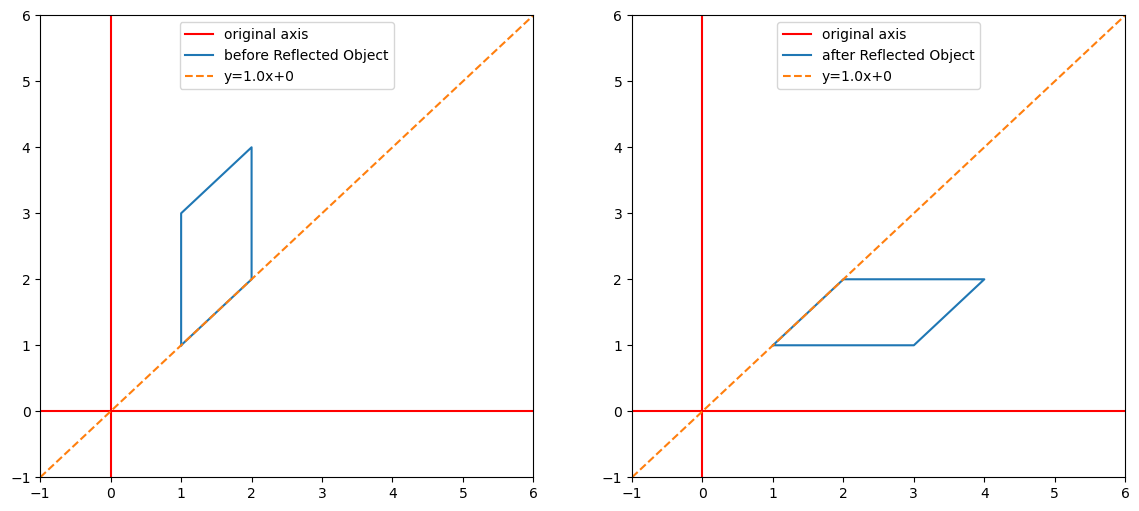

In [56]:
# rectangle of cordinate A(1, 1), B(2, 2), C(2, 4), D(1, 3)
obj = np.array([[1, 2, 2, 1], \
                [1, 2, 4, 3],\
                [1, 1, 1, 1]])


obj_prime = reflection(45, 0, obj)

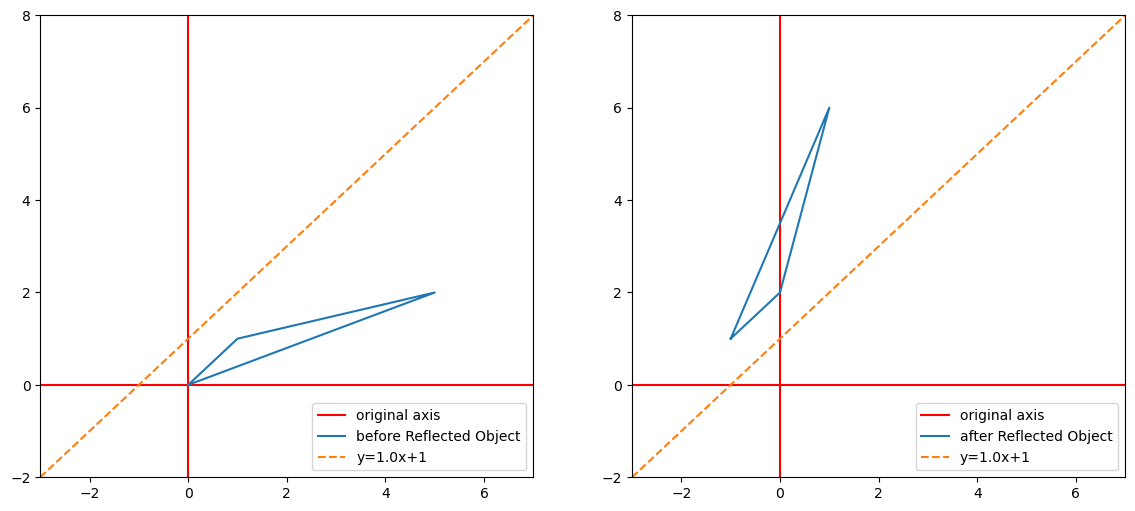

In [57]:
# trangle of cordinate A(0, 0), B(1, 1), C(5, 2)
obj2 = np.array([[0, 1, 5], \
                 [0, 1, 2],\
                 [1, 1, 1]])

theta = 45
c = 1
obj_prime1 = reflection(theta, c, obj2)